In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import nltk
nltk.download('omw-1.4')
nltk.download("wordnet")
from sklearn.svm import LinearSVC

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lucasvilsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lucasvilsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Tf-idf

In [19]:
df = pd.read_csv("dataset.csv")
text = list(df.text)
label = list(df.target)

x_train, x_val, y_train, y_val = train_test_split(text, label, test_size = 0.075)

In [20]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print(f'Vectorizer fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectorizer fitted.
No. of feature_words:  500000


In [21]:
X_train = vectoriser.transform(x_train)
X_test  = vectoriser.transform(x_val)

In [22]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(f"accuracy: {accuracy_score(y_val, y_pred)}")
    cf_matrix = confusion_matrix(y_val, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted ", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual "   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion ", fontdict = {'size':18}, pad = 20)

accuracy: 0.81358125
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     79980
           1       0.81      0.82      0.82     80020

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



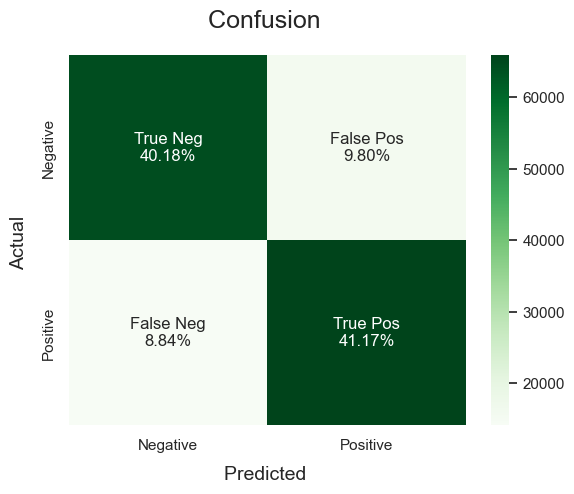

In [23]:
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)